In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# Loading the data
train = pd.read_csv("data/train.csv", index_col="id")
test = pd.read_csv("data/test.csv", index_col="id")
train

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
id,,,,,,,,,,,,,,
0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,237799.0,NaN,0.748942,0.511234,0.002913,0.0,0.173803,-8.853673,0,0.078060,168.262924,3,0.178159,0
39996,191119.0,0.067488,0.672830,0.889685,0.001225,5.0,0.122924,-7.798993,0,0.188607,110.684544,3,0.790626,0
39997,160879.0,0.877431,0.409065,0.292671,NaN,10.0,0.110664,-15.378585,0,0.031294,99.556074,3,0.177947,1


In [25]:
train["isTrain"] = True
test["isTrain"] = False
tt = pd.concat([train, test]).reset_index(drop=True).copy()

# Exploratory Data Analysis

First plot of the data, to give me an idea how it is distributed

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

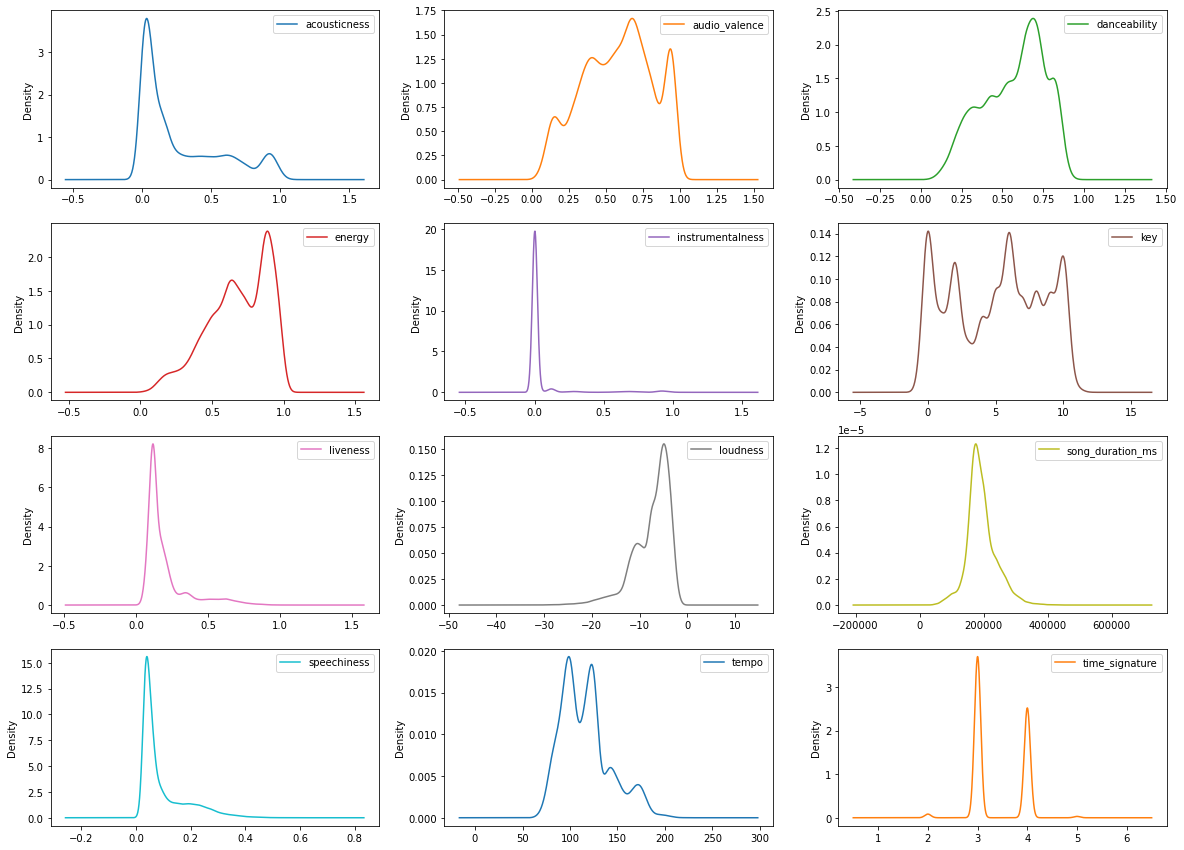

In [26]:
(train[train.columns.difference(["audio_mode", "song_popularity"])]
.plot(kind="density", subplots=True, layout=(4,3), figsize=(20,15), sharex=False))

<AxesSubplot:title={'center':'% of Missing Values'}>

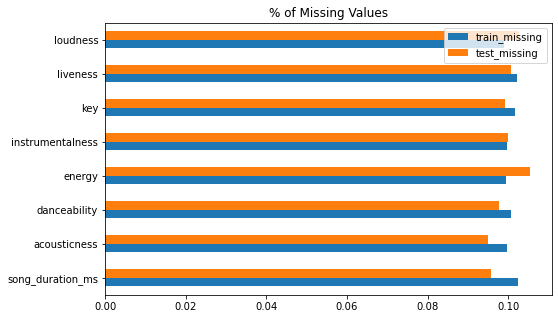

In [27]:
ncounts = pd.DataFrame([train.isna().mean(), test.isna().mean()]).T
ncounts =ncounts.rename(columns={0: "train_missing", 1: "test_missing"})

(ncounts.query("train_missing > 0")
.plot(kind="barh", figsize=(8,5), title="% of Missing Values"))

In [28]:
nacols = [
    "song_duration_ms",
    "acousticness",
    "danceability",
    "energy",
    "instrumentalness",
    "key",
    "liveness",
    "loudness",
]

In [29]:
tt["n_missing"] = tt[nacols].isna().sum(axis=1)
train["n_missing"] = train[nacols].isna().sum(axis=1)
test["n_missing"] = test[nacols].isna().sum(axis=1)


<AxesSubplot:title={'center':'Number of Missing Values per Sample'}>

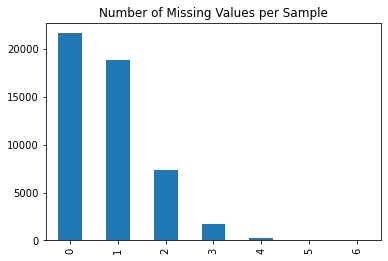

In [30]:
(
tt["n_missing"]
.value_counts()
.plot(kind="bar", title="Number of Missing Values per Sample"
)
)

### Imbalance in missing values when splitting by other features

In [31]:
cat_features = ["key", "audio_mode"]
tt.groupby("audio_mode")["n_missing"].mean()

audio_mode
0    0.804547
1    0.799677
Name: n_missing, dtype: float64

In [32]:
tt.groupby("audio_mode").apply(lambda a: a[:])

song_duration_ms  acousticness  danceability    energy  \
audio_mode                                                                 
0          0              212990.0      0.642286      0.856520  0.707073   
           2              193213.0           NaN      0.188387  0.783524   
           3              249893.0      0.488660      0.585234  0.552685   
           4              165969.0      0.493017           NaN  0.740982   
           5              188891.0      0.035655      0.825919  0.804528   
...                            ...           ...           ...       ...   
1          49990          222116.0      0.619508      0.720173  0.609822   
           49994          201768.0      0.211539      0.511677  0.687080   
           49995          196204.0      0.083936      0.823252  0.442246   
           49997          188434.0      0.753472      0.783947  0.498261   
           49999          157896.0      0.019852      0.720380       NaN   

                  instrumentalness   key  liveness   loudness  audio_mode  \
audio_mode                                                                  
0          0              0.002001  10.0       NaN  -5.619088           0   
           2             -0.002694   5.0  0.170499  -4.951759           0   
           3              0.000608   0.0  0.094805  -7.893694           0   
           4              0.002033  10.0  0.094891  -2.684095           0   
           5             -0.000005   4.0  0.120758  -6.122926           0   
...                            ...   ...       ...        ...         ...   
1          49990          0.001350   4.0  0.112039 -21.360346           1   
           49994         -0.000517  10.0  0.136102        NaN           1   
           49995          0.002990   1.0  0.123921  -8.682195           1   
           49997          0.134027   6.0  0.088147 -11.812606           1   
           49999          0.037727   2.0  0.139422  -4.965311           1   

                  speechiness       tempo  time_signature  audio_valence  \
audio_mode                                                                 
0          0         0.082570  158.386236               4       0.734642   
           2         0.052282  178.685791               3       0.425536   
           3         0.035618  128.715630               3       0.453597   
           4         0.050746  121.928157               4       0.741311   
           5         0.039012  115.679128               4       0.709408   
...                       ...         ...             ...            ...   
1          49990     0.059219  138.603813               3       0.458672   
           49994     0.044983  146.095839               3       0.760825   
           49995     0.041171   98.264618               4       0.784104   
           49997     0.029526  119.090558               4       0.482961   
           49999     0.053257  109.873611               4       0.971368   

                  song_popularity  isTrain  n_missing  
audio_mode                                             
0          0                  0.0     True          1  
           2                  0.0     True          1  
           3                  0.0     True          0  
           4                  0.0     True          1  
           5                  0.0     True          0  
...                           ...      ...        ...  
1          49990              NaN    False          0  
           49994              NaN    False          1  
           49995              NaN    False          0  
           49997              NaN    False          0  
           49999              NaN    False          1  

[50000 rows x 16 columns]

We can conclude that those missing values aren't related to a particular audio mode because is 80% in both.

In [33]:
tt.groupby("time_signature")["n_missing"].agg(["mean", "count"])

,mean,count
time_signature,,
2,0.786337,688
3,0.805649,29174
4,0.800352,19895
5,0.744856,243


The same, the type of time signature isn't related to the missing values, almost 80% in all.

In [34]:
train.groupby("song_popularity")["n_missing"].mean()

song_popularity
0    0.807505
1    0.799739
Name: n_missing, dtype: float64

### Prep - Create Tag Columns with missing indicators

In [35]:
tt_missing_tag_df = tt[nacols].isna()
tt_missing_tag_df.columns = [f"{c}_missing" for c in tt_missing_tag_df.columns]
tt_missing_tag_df

,song_duration_ms_missing,acousticness_missing,danceability_missing,energy_missing,instrumentalness_missing,key_missing,liveness_missing,loudness_missing
0,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False,False


In [36]:
tt = pd.concat([tt, tt_missing_tag_df], axis=1)
tt

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,...,isTrain,n_missing,song_duration_ms_missing,acousticness_missing,danceability_missing,energy_missing,instrumentalness_missing,key_missing,liveness_missing,loudness_missing
0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,...,True,1,False,False,False,False,False,False,True,False
1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,...,True,1,True,False,False,False,False,False,False,False
2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,...,True,1,False,True,False,False,False,False,False,False
3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,...,True,0,False,False,False,False,False,False,False,False
4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,...,True,1,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,196204.0,0.083936,0.823252,0.442246,0.002990,1.0,0.123921,-8.682195,1,0.041171,...,False,0,False,False,False,False,False,False,False,False
49996,218343.0,0.105279,0.683743,0.848627,0.001911,6.0,0.106522,-4.946250,0,0.033605,...,False,0,False,False,False,False,False,False,False,False
49997,188434.0,0.753472,0.783947,0.498261,0.134027,6.0,0.088147,-11.812606,1,0.029526,...,False,0,False,False,False,False,False,False,False,False
49998,173044.0,0.863579,0.373283,0.476142,0.000049,10.0,0.122122,-12.371232,0,0.190628,...,False,0,False,False,False,False,False,False,False,False


__Predicting target using only missing value indicators as features__

In [39]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score

lr = LogisticRegressionCV(scoring="accuracy")

X = tt.query("isTrain")[tt_missing_tag_df.columns]
y = tt.query("isTrain")["song_popularity"]
X

,song_duration_ms_missing,acousticness_missing,danceability_missing,energy_missing,instrumentalness_missing,key_missing,liveness_missing,loudness_missing
0,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
39995,False,True,False,False,False,False,False,False
39996,False,False,False,False,False,False,False,False
39997,False,False,False,False,True,False,False,False
39998,False,True,False,True,False,False,False,False


In [40]:
lr.fit(X, y)
lr.score(X, y)
preds = lr.predict_proba(X)[:, 0]

roc_auc_score(y, preds)

0.4928022710677621

### Level 1: Drop 'em
Drop all rows with missing values (axis=0):
- This doesn't work on test because we can't just predict those values

Drop all missing columns:
- Leaves only a few features to use

In [41]:
tt.shape, tt.dropna(axis=0).shape

((50000, 24), (17259, 24))

In [42]:
tt.shape, tt.dropna(axis=1).shape

((50000, 24), (50000, 15))

### Level 2: Pandas Imputation

- _fillna_ for tabular data
- _groupby_ fills
- _ffill_ and _bfill_ for time series data

In [43]:
# Fill with a default value
tt["song_duration_ms"].fillna(-999).head(5)

0    212990.0
1      -999.0
2    193213.0
3    249893.0
4    165969.0
Name: song_duration_ms, dtype: float64

In [45]:
# Fill with mean
tt["song_duration_ms_mean_imp"] = tt["song_duration_ms"].fillna(tt["song_duration_ms"].mean())
(tt
.loc[tt['song_duration_ms'].isna()]
[["song_duration_ms", "song_duration_ms_mean_imp"]]
.head(5))

,song_duration_ms,song_duration_ms_mean_imp
1,NaN,193150.809021
13,NaN,193150.809021
14,NaN,193150.809021
15,NaN,193150.809021
28,NaN,193150.809021


In [46]:
tt["song_duration_ms_median_imp"] = tt["song_duration_ms"].fillna(
    tt["song_duration_ms"].median()
)

tt.loc[tt['song_duration_ms'].isna()] \
    [["song_duration_ms",
      "song_duration_ms_mean_imp",
     "song_duration_ms_median_imp"]] \
    .head(5)

,song_duration_ms,song_duration_ms_mean_imp,song_duration_ms_median_imp
1,NaN,193150.809021,186552.5
13,NaN,193150.809021,186552.5
14,NaN,193150.809021,186552.5
15,NaN,193150.809021,186552.5
28,NaN,193150.809021,186552.5


In [48]:
sd_mean_map = tt.groupby("audio_mode")["song_duration_ms"] \
    .mean().to_dict()
sd_mean_map

{0: 193860.63699819762, 1: 191649.42961114578}

In [49]:
sd_mean_series = tt["audio_mode"].map(sd_mean_map)
tt["song_duration_ms_mean_audio_mode"] = \
    tt["song_duration_ms"].fillna(sd_mean_series)

In [51]:
tt.query('song_duration_ms_missing == True') \
    [['audio_mode','song_duration_ms_mean_audio_mode']].head(5)

,audio_mode,song_duration_ms_mean_audio_mode
1,1,191649.429611
13,0,193860.636998
14,0,193860.636998
15,0,193860.636998
28,0,193860.636998


### Sklearn Imputation
- _SimpleImputer_ similar to pandas _fillna_
- _IterativeImputer_
- _KNNImputer_

In real world situations you will want to fit and transform within the cross validation loop to ensure no leakage.

In Kaggle competitions we sometimes know all of the features for the test set. So it may be advantageous to fit on all the data. THis does not work for code competitions because we can't see the test data before our model predicts.

In [53]:
FEATURES = [
    "song_duration_ms",
    "acousticness",
    "danceability",
    "energy",
    "instrumentalness",
    "key",
    "liveness",
    "loudness",
    "audio_mode",
    "speechiness",
    "tempo",
    "time_signature",
    "audio_valence",
]

In [52]:
# SimpleImputer
from sklearn.impute import SimpleImputer
imptr = SimpleImputer(strategy="mean", add_indicator=False)

193165.84757235576

In [56]:
# Fit & Transform on train, transform only on val/test
tr_imp = imptr.fit_transform(train[FEATURES])
test_imp = imptr.fit_transform(test[FEATURES])

In [57]:
# For kaggle competition you can kind of cheat by fitting on all data
tt_impute = imptr.fit_transform(tt[FEATURES])
tt_simple_impute = pd.DataFrame(tt_impute, columns=FEATURES)
tt_simple_impute.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,212990.000000,0.642286,0.856520,0.707073,0.002001,10.0,0.198086,-5.619088,0.0,0.082570,158.386236,4.0,0.734642
1,193150.809021,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1.0,0.127358,102.752988,3.0,0.711531
2,193213.000000,0.277183,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0.0,0.052282,178.685791,3.0,0.425536
3,249893.000000,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0.0,0.035618,128.715630,3.0,0.453597
4,165969.000000,0.493017,0.570724,0.740982,0.002033,10.0,0.094891,-2.684095,0.0,0.050746,121.928157,4.0,0.741311


__Iterative Imputer__: Multivariate imputer that estimates each feature from all the others, by modeling each feature with missing values as a function. Uses by default the _BayesianRidge_ model to impute.

Tip: We want to fit and predict on all columns, because the model is using all features to help fill the missing values.

In [58]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [59]:
it_imputer = IterativeImputer(max_iter=15)
train_iterimp = it_imputer.fit_transform(train[FEATURES])
test_iterimp = it_imputer.fit_transform(test[FEATURES])
tt_iterimp = it_imputer.fit_transform(tt[FEATURES])
# DataFrame
tt_iter_imp_df = pd.DataFrame(tt_iterimp, columns=FEATURES)

### KNN Imputer

In [60]:
from sklearn.impute import KNNImputer

knn_imptr = KNNImputer(n_neighbors=1)
train_knnimp = knn_imptr.fit_transform(train[FEATURES])
test_knnimp = knn_imptr.fit_transform(test[FEATURES])
tt_knnimp = knn_imptr.fit_transform(tt[FEATURES])

knn_imp_df = pd.DataFrame(tt_knnimp, columns=FEATURES)

### Let's check the imputation distribution

<AxesSubplot:title={'center':'KNN Impute'}, ylabel='Frequency'>

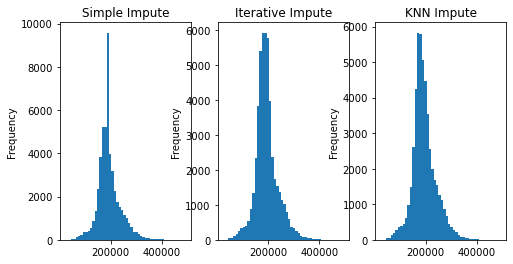

In [63]:
fig, axs = plt.subplots(1, 3, figsize=(8, 4))

tt_simple_impute["song_duration_ms"] \
    .plot(kind="hist", bins=50, ax=axs[0], title="Simple Impute")

tt_iter_imp_df["song_duration_ms"] \
    .plot(kind="hist", bins=50, ax=axs[1], title="Iterative Impute")

knn_imp_df["song_duration_ms"] \
    .plot(kind="hist", bins=50, ax=axs[2], title="KNN Impute")
